# Data Download and Exploration

This code means that the notebook will re-import your source code in `src` when it is edited (the default is not to re-import, because most modules are assumed not to change over time).  It's a good idea to include it in any exploratory notebook that uses `src` code

In [1]:
%load_ext autoreload
%autoreload 2

This snippet allows the notebook to import from the `src` module.  The directory structure looks like:

```
├── notebooks          <- Jupyter notebooks. Naming convention is a number (for ordering)
│   │                     followed by the topic of the notebook, e.g.
│   │                     01_data_collection_exploration.ipynb
│   └── exploratory    <- Raw, flow-of-consciousness, work-in-progress notebooks
│   └── report         <- Final summary notebook(s)
│
├── src                <- Source code for use in this project
│   ├── data           <- Scripts to download and query data
│   │   ├── sql        <- SQL scripts. Naming convention is a number (for ordering)
│   │   │                 followed by the topic of the script, e.g.
│   │   │                 03_create_pums_2017_table.sql
│   │   ├── data_collection.py
│   │   └── sql_utils.py
```

So we need to go up two "pardir"s (parent directories) to import the `src` code from this notebook.  You'll want to include this code at the top of any notebook that uses the `src` code.

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

The code to download all of the data and load it into a SQL database is in the `data` module within the `src` module.  You'll only need to run `download_data_and_load_into_sql` one time for the duration of the project.

In [3]:
# from src.data import data_collection

This line may take as long as 10-20 minutes depending on your network connection and computer specs

In [4]:
# data_collection.download_data_and_load_into_sql()

Now it's time to explore the data!

In [5]:
import psycopg2
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors
pd.set_option('max_colwidth', 80)

In [6]:
DBNAME = "opportunity_youth"

In [7]:
conn = psycopg2.connect(dbname=DBNAME)

In [8]:
# df = gp.read_file('tl_2017_53_puma10/tl_2017_53_puma10.shp')
# # df2_1 = df[(df['PUMACE10'] == '11610') | (df['PUMACE10'] == '11611') | (df['PUMACE10'] == '11612') |\
# #          (df['PUMACE10'] == '11613') | (df['PUMACE10'] == '11614') | (df['PUMACE10'] == '11615')]

# lst = [str(num) for num in range(11610, 11616)]
# df["s_kc"] = df['PUMACE10'].isin(lst)

# df.head(3)

In [9]:
# df3 = df[df['NAMELSAD10'].str.contains("King|Seattle")==True]
df["kc"] = df['NAMELSAD10'].str.contains("King|Seattle")

NameError: name 'df' is not defined

In [10]:
# df[df['NAMELSAD10'].str.contains('King', regex=False)].count()

In [10]:
df.head(3)

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,s_kc,kc
0,53,10200,5310200,"Skagit, Island & San Juan Counties PUMA",G6120,S,5470622131,2441658886,+48.4470835,-122.1737477,"POLYGON ((-122.44422 48.64527, -122.43685 48.64528, -122.43347 48.64529, -12...",False,False
1,53,10100,5310100,Whatcom County--Bellingham City PUMA,G6120,S,5459332804,1028183246,+48.8426531,-121.8364325,"POLYGON ((-122.40642 49.00230, -122.40617 49.00230, -122.40490 49.00230, -12...",False,False
2,53,10400,5310400,"Stevens, Okanogan, Pend Oreille & Ferry Counties PUMA",G6120,S,29389124389,489162432,+48.5031090,-118.7866777,"POLYGON ((-118.14859 47.88667, -118.14899 47.88678, -118.14962 47.88688, -11...",False,False


In [11]:
# df[df['NAMELSAD10'].str.contains('Seattle')].count()

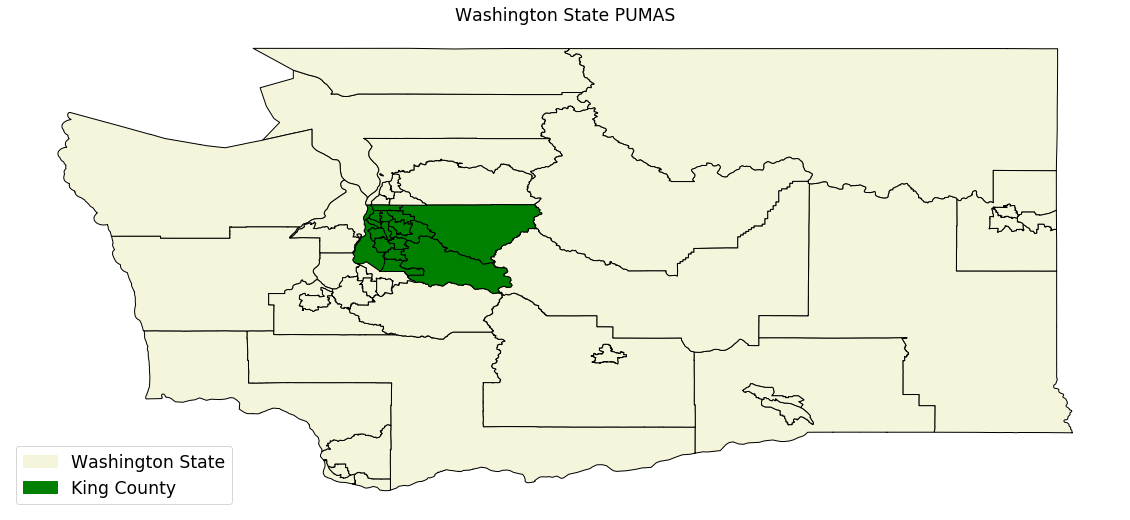

In [12]:
fig1, ax = plt.subplots(figsize=(20,10))
wa_patch = mpatches.Patch(color='beige', label='Washington State')
kc_patch = mpatches.Patch(color='green', label='King County')
ax.legend(handles=[wa_patch, kc_patch], loc='lower left', fontsize='xx-large')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["beige", "green"])
ax.set_title('Washington State PUMAS', fontsize='xx-large')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
df.plot(ax=ax, column='kc', edgecolor='black', cmap=cmap)

In [13]:
fig1.savefig('1_wa_state.png', dpi=150, facecolor=None, edgecolor=None,
        orientation='landscape', papertype=None, format='png',
        transparent=False, bbox_inches=None, pad_inches=None, metadata=None)

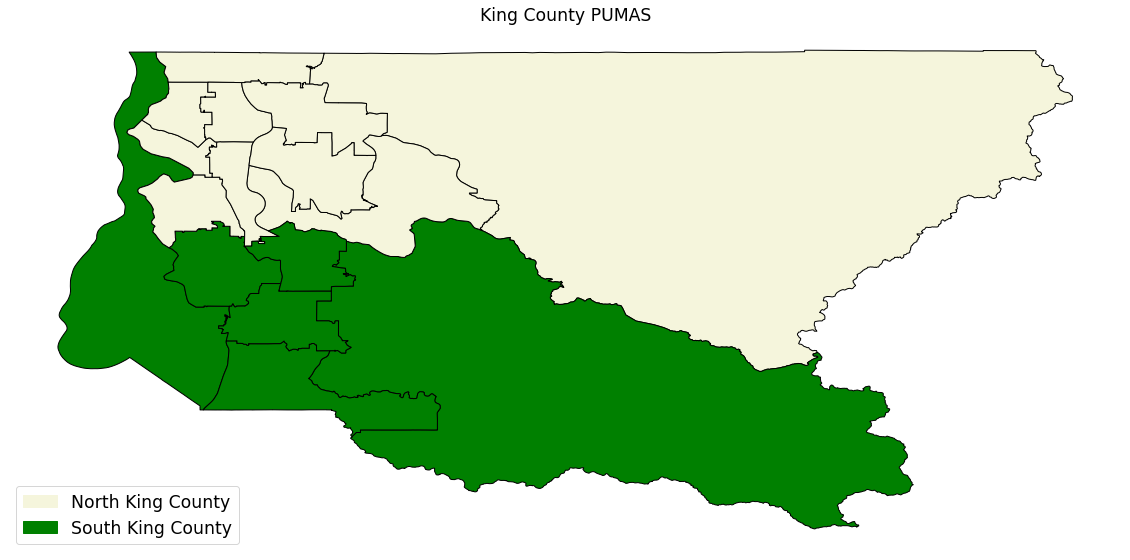

In [14]:
fig2, ax = plt.subplots(figsize=(20,10))
n_kc_patch = mpatches.Patch(color='beige', label='North King County')
s_kc_patch = mpatches.Patch(color='green', label='South King County')
ax.legend(handles=[n_kc_patch, s_kc_patch], loc='lower left', fontsize='xx-large')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["beige", "green"])
ax.set_title('King County PUMAS', fontsize='xx-large')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
df[df['kc']==True].plot(ax=ax, column='s_kc', edgecolor='black', cmap=cmap)

In [15]:
fig2.savefig('2_king_county.png', dpi=150, facecolor=None, edgecolor=None,
        orientation='landscape', papertype=None, format='png',
        transparent=False, bbox_inches=None, pad_inches=None, metadata=None)

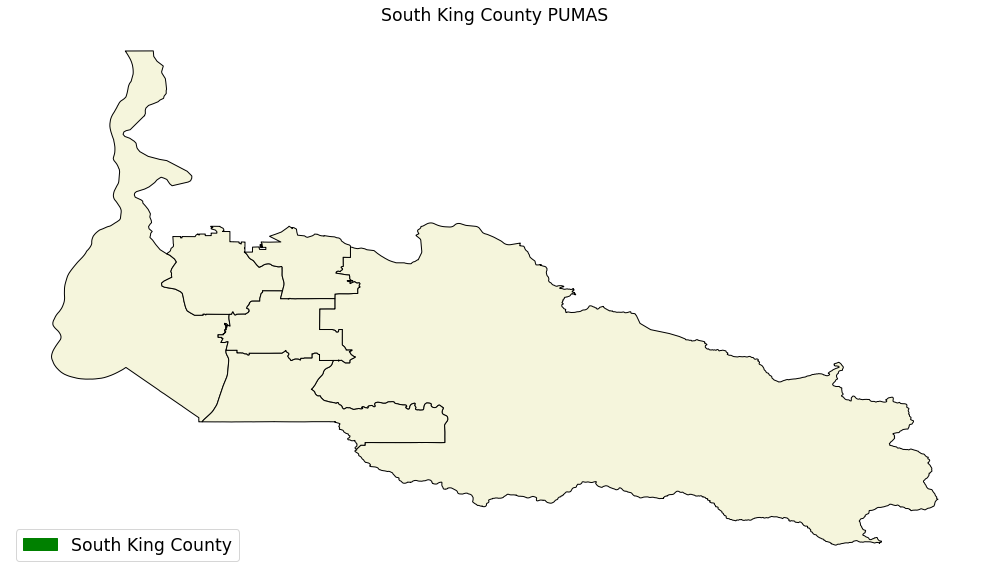

In [16]:
fig3, ax = plt.subplots(figsize=(20,10))
s_kc_patch = mpatches.Patch(color='green', label='South King County')
ax.legend(handles=[s_kc_patch], loc='lower left', fontsize='xx-large')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["beige", "green"])
ax.set_title('South King County PUMAS', fontsize='xx-large')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
df[df['s_kc']==True].plot(ax=ax,column='s_kc', edgecolor='black', cmap=cmap)

In [17]:
fig3.savefig('3_south_king_county.png', dpi=150, facecolor=None, edgecolor=None,
        orientation='landscape', papertype=None, format='png',
        transparent=False, bbox_inches=None, pad_inches=None, metadata=None)

Notice the `LIMIT 10` above.  These tables have a large amount of data in them and **your goal is to use SQL to create your main query, not Pandas**.  Pandas can technically do everything that you need to do, but it will be much slower and more inefficient.  Nevertheless, Pandas is still a useful tool for exploring the data and getting a basic sense of what you're looking at.

Make sure you close the DB connection when you are done using it

In [14]:
conn.close()

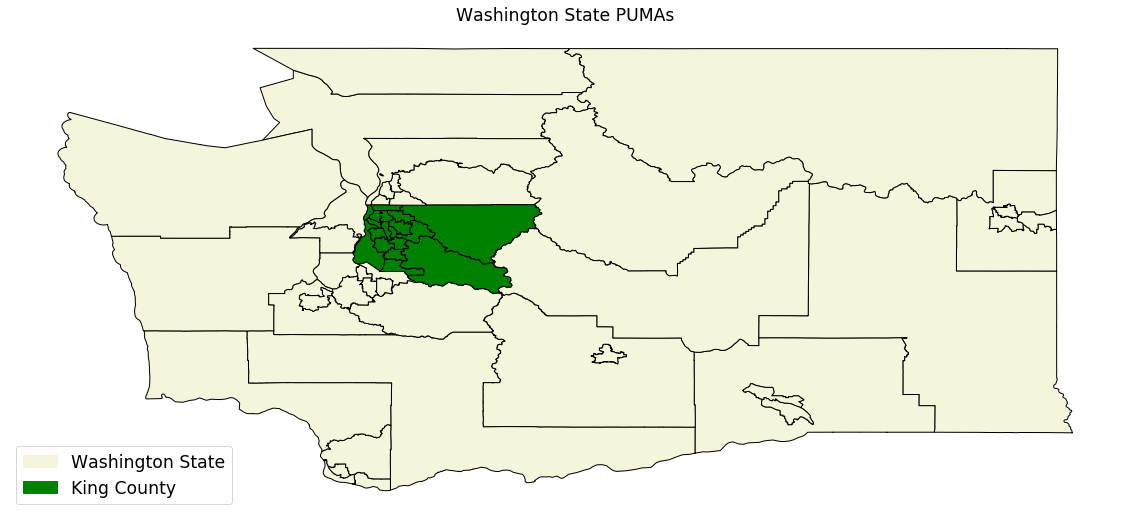

In [20]:
# import functions to be called from separate functions.py file
# from src.functions import map_creation, save_map, create_df
import src.functions as fc

# first map: whole state of Washington
df = fc.create_df()
fig1, ax1, cmap = fc.map_creation(["Washington State", "King County"], "Washington State PUMAs");
df.plot(ax=ax1, column="kc", edgecolor="black", cmap=cmap);

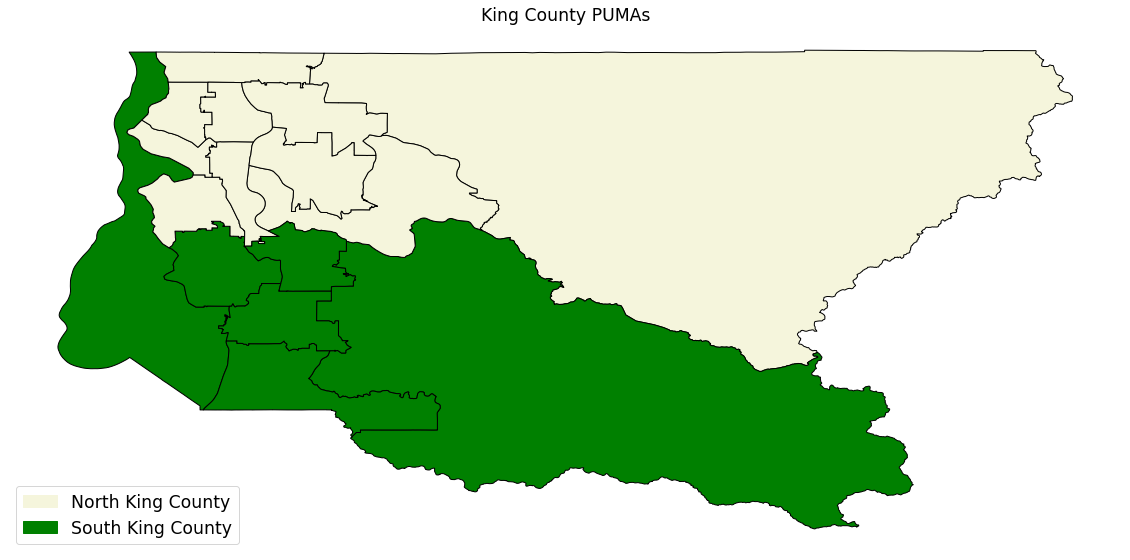

In [21]:
# second map: all of King County
fig2, ax2, cmap = fc.map_creation(["North King County", "South King County"], "King County PUMAs");
df[df["kc"]==True].plot(ax=ax2, column="s_kc", edgecolor="black", cmap=cmap);

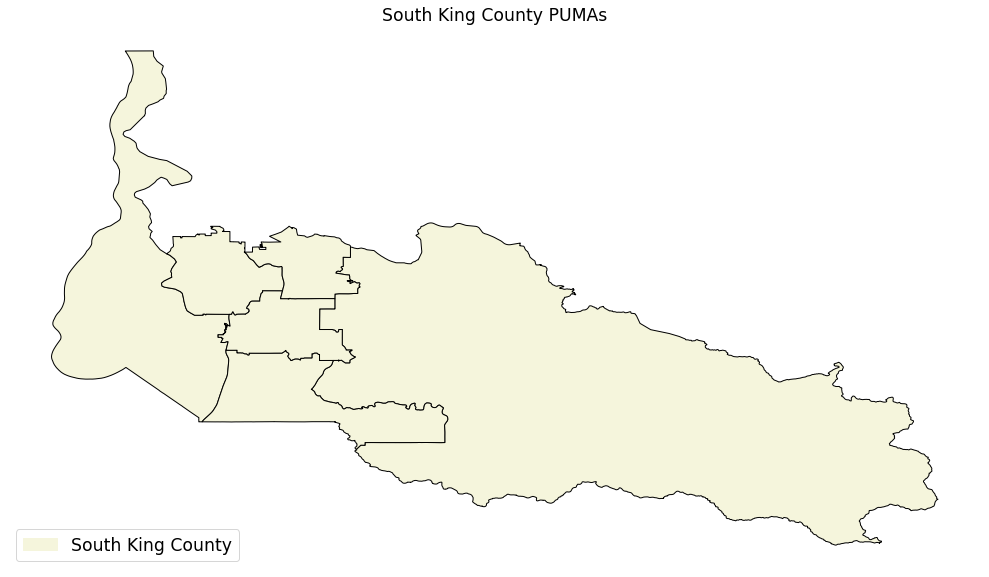

In [22]:
# third map: South King County only
fig3, ax3, cmap = fc.map_creation(["South King County"], "South King County PUMAs");
df[df["s_kc"]==True].plot(ax=ax3, column="s_kc", edgecolor="black", cmap=cmap);

In [23]:
fc.save_map(fig1, '1_wa_state.png')

In [24]:
fc.save_map(fig2, '2_king_county.png')

In [25]:
fc.save_map(fig3, '3_south_king_county.png')